# This notebook is the version 2 of the trigger efficiency. Removing the pt requirement to match reco muons to gen muons and adding eff vs $\Delta R$ plots<br>
root file: ch2mu2eTrEff_rmpt.root

In [3]:
import ROOT
fin = ROOT.TFile.Open("../../outputs/rootfiles/modules/ch2mu2eTrEff_rmpt.root","Read")

S1 = "mXX-100_mA-0p25_lxy-300" # fewer events in this sample
S2 = "mXX-500_mA-0p25_lxy-300"
S3 = "mXX-500_mA-1p2_lxy-300"
S4 = "mXX-1000_mA-5_lxy-300"

stest = S4

ch = ["2mu2e","4mu"]

samples = [S1, S2, S3, S4]
colors = [1,2,3,4,5,6,7]
markers = [24,25,26,32,27]

Welcome to JupyROOT 6.12/07


### number of gen muons

In [2]:
# number of gen muons
c1_ng = ROOT.TCanvas("c1_ng","c1_ng", 600, 400)
c1_ng.SetGrid(1,1)
c1_ng.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
leg.SetHeader(S3, "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = "ngenall"

maxb = 0
for i, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod) 
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb + maxb*0.2,"Y")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Number of gen muons; Muons; entries")
    leg.AddEntry(hist, sam, "p")
    hist.Draw("same")
leg.Draw()

Info in <TCanvas::Print>: png file nbout/dr0p40p2/n_gen.png has been created


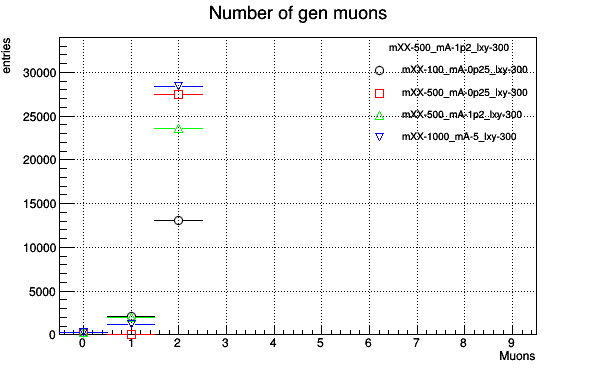

In [3]:
c1_ng.Draw()
c1_ng.SaveAs('nbout/dr0p40p2/n_gen.png')

Need to look at the events with less than two muons

## Only using events with 2 gen muons

### $\Delta R$ gen muons

In [4]:
#Delta R for gen muons
c1_drg = ROOT.TCanvas("c1_drg","c1_drg", 600, 400)
c1_drg.SetGrid(1,1)
c1_drg.cd()
leg = ROOT.TLegend (.6, .6, 0.9, .9)
leg.SetHeader("Samples", "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = "gen_dR"

maxb = 0
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod) 
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb + maxb*0.1,"Y")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("#Delta R for gen muons; #Delta R; Events")
    leg.AddEntry(hist, sam, "p")
    hist.Draw("same")
leg.Draw()

Info in <TCanvas::Print>: png file nbout/dr0p40p2/dr_gen.png has been created


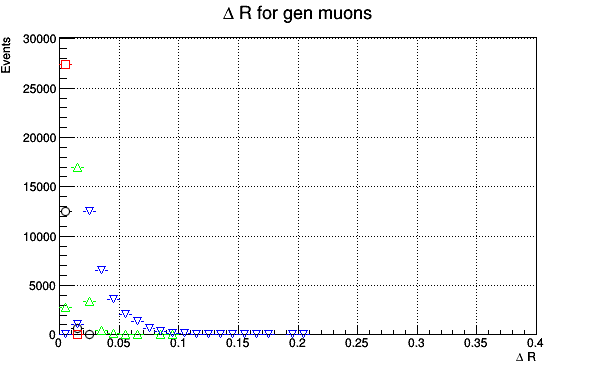

In [15]:
c1_drg.Draw()
c1_drg.SaveAs('nbout/dr0p40p2/dr_gen.png')

### $\Delta R$ reco muons matched to gen muons

In [5]:
#dR reco muons
c1_drr = ROOT.TCanvas("c1_drr","c1_drr", 600, 400)
c1_drr.SetGrid(1,1)
c1_drr.cd()
leg = ROOT.TLegend (.6, .6, 0.9, .9)
leg.SetHeader("Samples", "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)
htod = "reco_dR"
maxb = 0
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy
for i,sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod) 
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb + maxb*0.1,"Y")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("#Delta R reco muons; #Delta R; Events")
    leg.AddEntry(hist, sam, "p")
    hist.Draw("same")
leg.Draw()

Info in <TCanvas::Print>: png file nbout/dr0p40p2/dr_gen.png has been created


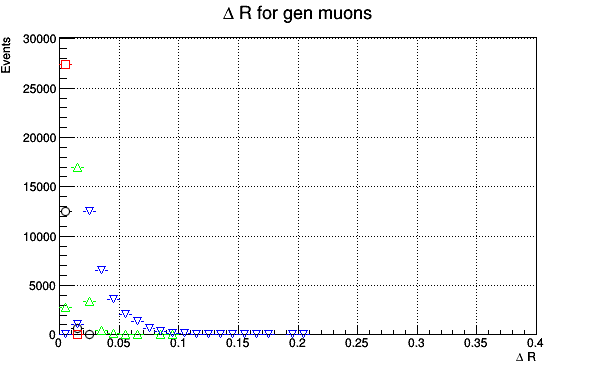

In [16]:
c1_drr.Draw()
c1_drr.SaveAs('nbout/dr0p40p2/dr_reco.png')

### Matching reco muons to gen muons <br>
Now for the two reco muons matched to the gen muons.<br>
A reco muon is matched to a gen muon if: <br> 1. $\Delta R (gen,reco) <0.4$ <br>

In [4]:
#hists for reco match to gen
c1_match_hist = ROOT.TCanvas("c1_match_hist","c1_match_hist", 600, 400)
c1_match_hist.SetGrid(1,1)
c1_match_hist.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["eff_num", "eff_den"]
maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy
for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    hist.SetAxisRange(0., maxb+ 0.15*maxb,"Y")
    hist.SetStats(0)
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Leading p_{T} gen muons; p_{T}^{gen} [GeV]; Events")
    leg.AddEntry(hist, h[4:], "p")
    hist.Draw("same")
leg.Draw()

In [5]:
#eff matching reco to gen
c1_match_eff = ROOT.TCanvas("c1_match_eff","c1_match_eff", 600, 400)
c1_match_eff.SetGrid(1,1)
c1_match_eff.cd()

leg1 = ROOT.TLegend (.2, .2, .5, .5)
leg1.SetHeader("Samples:","C");
leg1.SetBorderSize(0)
leg1.SetFillStyle(0)

num = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "eff_num")
den = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "eff_den")
num.SetTitle(" ; p_{T} [GeV]; Efficiency")
eff = ROOT.TEfficiency(num, den)
eff.SetLineColor(ROOT.kRed)
eff.SetMarkerColor(ROOT.kRed)
leg1.AddEntry(eff, stest, "l")
eff.Draw()
leg1.Draw()

Info in <TCanvas::Print>: pdf file nbout/dr0p40p2/pT_match_hist.pdf has been created
Info in <TCanvas::Print>: png file nbout/dr0p40p2/pT_match_eff.png has been created


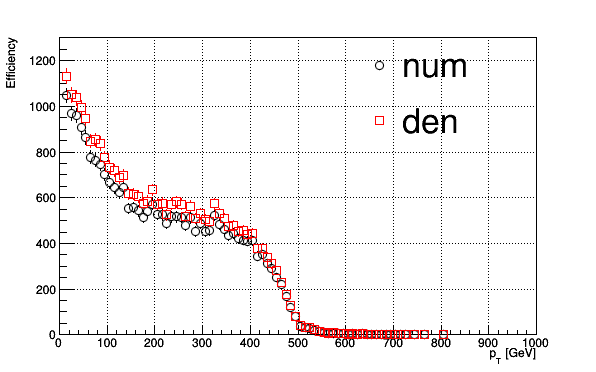

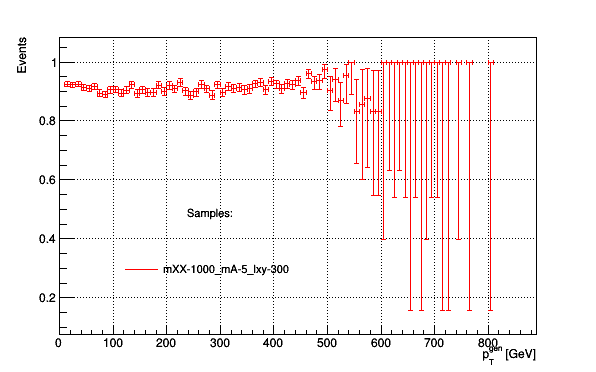

In [6]:
c1_match_hist.Draw()
c1_match_hist.SaveAs('nbout/dr0p40p2/pT_match_hist.pdf')
c1_match_eff.Draw()
c1_match_eff.SaveAs('nbout/dr0p40p2/pT_match_eff.png')

Info in <TCanvas::Print>: png file nbout/dr0p40p2/pT_match_eff.png has been created


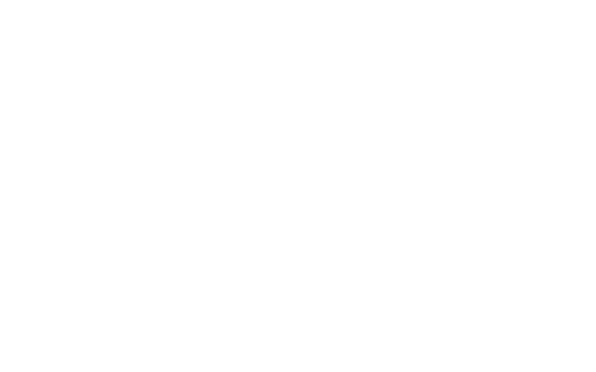

In [8]:
#hist for trEff and pT
c1_pt_hist = ROOT.TCanvas("c1_pt_hist","c1_pt_hist", 600, 400)
c1_pt_hist.SetGrid(1,1)
c1_pt_hist.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["Matched_pT", "Total_pT"]
maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    hist.SetAxisRange(0., maxb + 0.15*maxb ,"Y")
    hist.SetStats(0)
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Leading p_{T}; p_{T}^{reco} [GeV]; Events")
    leg.AddEntry(hist, h[:], "p")
    hist.Draw("same")
leg.Draw()

In [9]:
#TrEff for pT
c1_pt_treff = ROOT.TCanvas("c1_pt_treff","c1_pt_treff", 600, 400)
c1_pt_treff.SetGrid(1,1)
c1_pt_treff.cd()

leg1 = ROOT.TLegend (.1, .1, .4, .4)
leg1.SetHeader("Samples:","C");
leg1.SetBorderSize(0)
leg1.SetFillStyle(0)

num = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "Matched_pT")
den = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "Total_pT")
num.SetTitle(" ; -p_{T} [GeV]; Efficiency")
eff = ROOT.TEfficiency(num, den)
eff.SetLineColor(ROOT.kRed)
eff.SetMarkerColor(ROOT.kRed)
leg1.AddEntry(eff, stest, "l")
eff.Draw()

leg1.Draw()

start with dr

In [10]:
#dR hists
c1_dR_hist = ROOT.TCanvas("c1_dR_hist","c1_dR_hist", 600, 400)
c1_dR_hist.SetGrid(1,1)
c1_dR_hist.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["Matched_dR", "Total_dR"]
maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    hist.SetAxisRange(0., maxb + 0.15*maxb ,"Y")
    hist.SetStats(0)
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("; #Delta R; Efficiency")
    leg.AddEntry(hist, h[:], "p")
    hist.Draw("same")

In [11]:
#dR trigger efficiency
c1_dR_eff = ROOT.TCanvas("c1_dR_eff","c1_dR_eff", 600, 400)
c1_dR_eff.SetGrid(1,1)
c1_dR_eff.cd()
leg1 = ROOT.TLegend (.1, .1, .4, .4)
leg1.SetHeader("Samples:","C");
leg1.SetBorderSize(0)
leg1.SetFillStyle(0)

num = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "Matched_dR")
den = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "Total_dR")
num.SetTitle(" ; #Delta R; Efficiency")
eff = ROOT.TEfficiency(num, den)
eff.SetLineColor(ROOT.kRed)
eff.SetMarkerColor(ROOT.kRed)
leg1.AddEntry(eff, stest, "l")
eff.Draw()

#### First look at an efficiency.

# $\epsilon = \frac{\text{Events with both reco muons matched to gen muons}}{\text{Total events with 2 gen muons}}$
<br>

$p_{T}$ distributions for events with 2 muons macthed to gen muons (num) and all events with two gen muons (den)

$\Delta R$ for gen muons follow trends seems before

Good efficiency up to 280 GeV.<br>

# Now trigger efficiency

Definitions:<br>
# $\epsilon = \frac{\text{Events with both muons matched to trigger objects}}{\text{Total events with 2 reco muons}}$
<br>

## $\Delta R$ plots 

Info in <TCanvas::Print>: png file nbout/dr0p40p2/dR_tri_hist.png has been created


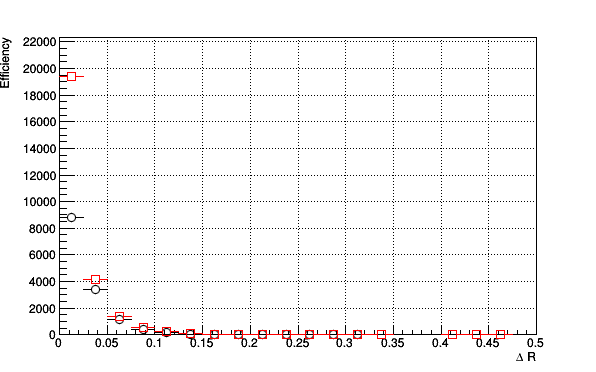

In [14]:
leg.Draw()
c1_dR_hist.Draw()
c1_dR_hist.SaveAs('nbout/dr0p40p2/dR_tri_hist.png')

Plots


Info in <TCanvas::Print>: pdf file nbout/dr0p40p2/pT_tri_hist.pdf has been created


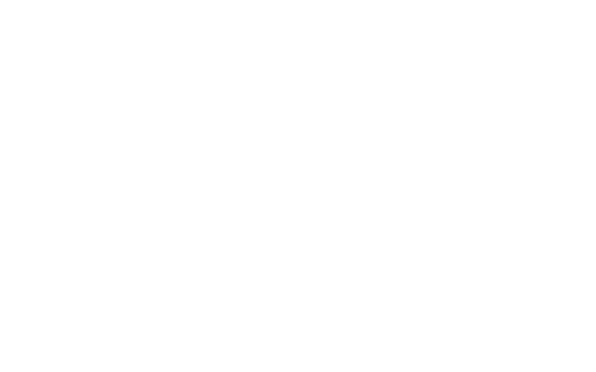

In [18]:
c1_pt_treff.Draw()
c1_pt_treff.SaveAs('nbout/dr0p40p2/pT_tri_hist.pdf')

Info in <TCanvas::Print>: png file nbout/dr0p40p2/dR_tri_eff.png has been created


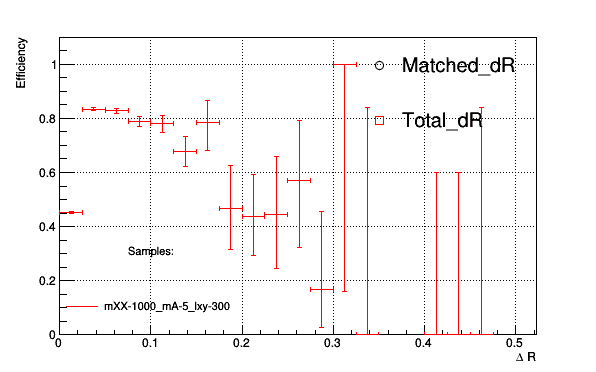

In [19]:
leg1.Draw()
c1_dR_eff.Draw()
c1_dR_eff.SaveAs('nbout/dr0p40p2/dR_tri_eff.png')

Info in <TCanvas::Print>: png file nbout/dr0p40p2/pT_tri_eff.png has been created


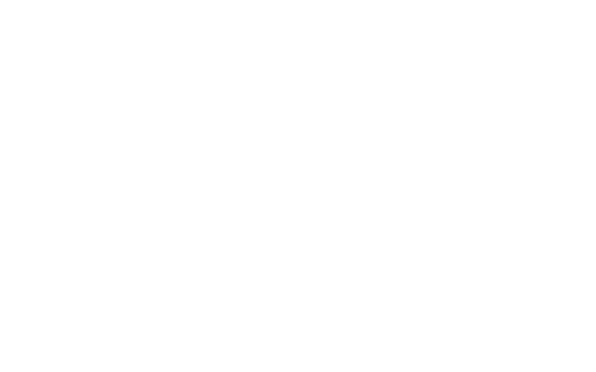

In [20]:
c1_pt_treff.Draw()
c1_pt_treff.SaveAs('nbout/dr0p40p2/pT_tri_eff.png')